In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%pip install scikit-learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
%pip install catboost xgboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
df = pd.read_csv('data/stud.csv')

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [23]:
X.shape, y.shape

((1000, 7), (1000,))

In [24]:
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [25]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numerical_features),
    ]
)

In [26]:
X = preprocessor.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

In [37]:
model_list = []
r2_list = []

In [38]:
for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print(f"Root mean squared error {model_train_rmse:.4f}")
    print(f"Mean Absolute Error: {model_train_mae:.4f}")
    print(f"R2 Score: {model_train_r2:.4f}")
    
    print('---------------------------------')

    print("Model performance for test set")
    print(f"Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"Mean Absolute Error: {model_test_mae:.4f}")
    print(f"R2 Score: {model_test_r2:.4f}", end='\n\n')
    r2_list.append(model_test_r2)

Linear Regression
Model performance for Training set
Root mean squared error 5.3231
Mean Absolute Error: 4.2667
R2 Score: 0.8743
---------------------------------
Model performance for test set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2 Score: 0.8804

Lasso
Model performance for Training set
Root mean squared error 6.5938
Mean Absolute Error: 5.2063
R2 Score: 0.8071
---------------------------------
Model performance for test set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 Score: 0.8253

Ridge
Model performance for Training set
Root mean squared error 5.3233
Mean Absolute Error: 4.2650
R2 Score: 0.8743
---------------------------------
Model performance for test set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 Score: 0.8806

K-Neighbors Regressor
Model performance for Training set
Root mean squared error 5.7077
Mean Absolute Error: 4.5167
R2 Score: 0.8555
---------------------------------
Model performance for test set
Root Mean 

In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest,0.851144
8,AdaBoostRegressor,0.845206
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.745067


Text(0, 0.5, 'Predicted')

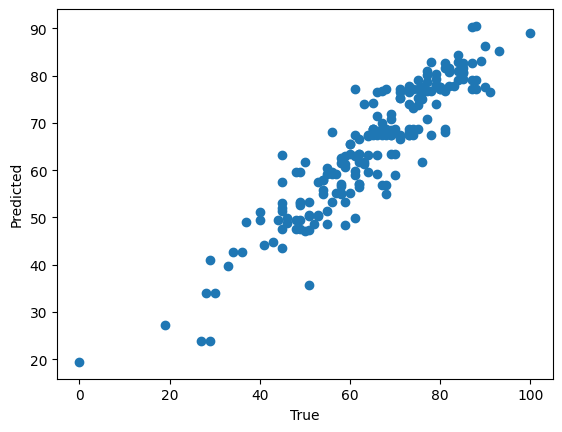

In [40]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("True")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

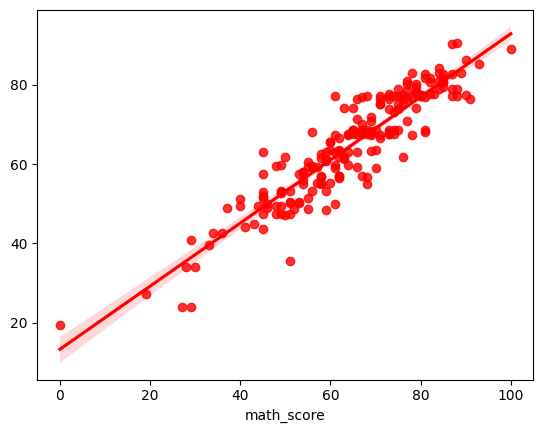

In [41]:
sns.regplot(x=y_test, y=y_test_pred, color='red')

In [42]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_test_pred, 'Difference': y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.518797,14.481203
737,53,57.455446,-4.455446
740,80,77.512346,2.487654
660,74,77.102362,-3.102362
411,84,84.285714,-0.285714
...,...,...,...
408,52,48.675182,3.324818
332,62,56.535912,5.464088
208,74,67.505263,6.494737
613,65,67.505263,-2.505263
